In [8]:
import numpy as np
import matplotlib.pyplot as plt

from dtree_skin_segmentation import *
import pandas as pd


In [9]:
df = pd.DataFrame(columns = ['h', 's', 'i', 'burn_skin'])


In [10]:
images = []
pixel_list = []
background_files = ['./Dataset/background3.jpeg'#,
                    #'./Dataset/real_image2_background.png',
                    # './Dataset/real_image3_background.png',
                    # './Dataset/real_image4_background.png',
                    # './Dataset/empty_background1.jpeg',
                    # './Dataset/empty_background2.jpeg'
                    ]
for filename in background_files:
    print("Processing:", filename)
    image_file = load_rgb_image(filename)
    hsi_image = RGB_TO_HSI(image_file, BGR=False)
    images.append(image_file)
    for col in range(0, hsi_image.shape[1]):
        for row in range(0, hsi_image.shape[0]):
            h, s, i = hsi_image[row,col]
            pixel_list.append({'h':h, 's':s, 'i':i, 'burn_skin':0})
    
new_df = pd.DataFrame(pixel_list)
df = pd.concat([df, new_df], axis=0, ignore_index=True)

Processing: ./Dataset/background3.jpeg


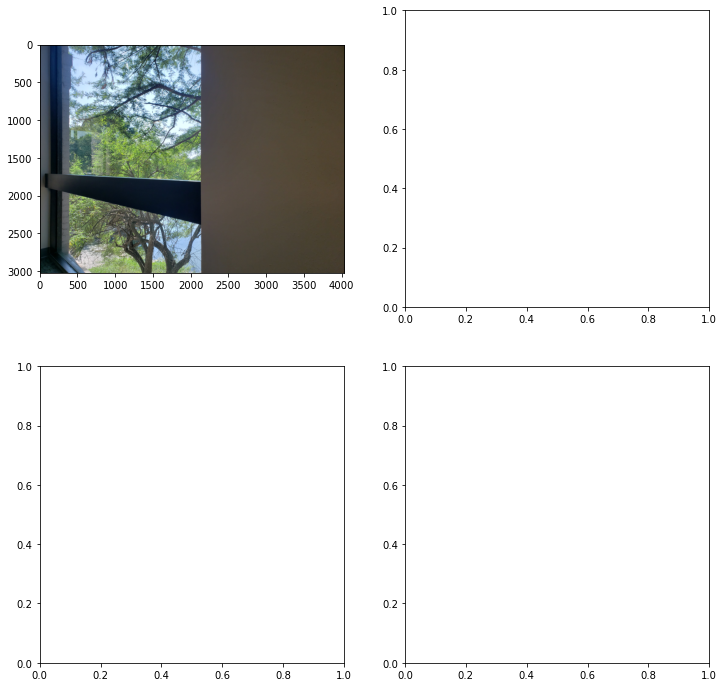

In [11]:
_, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(images[:4], axs):
    ax.imshow(img)
plt.show()

In [12]:
skin_files = ['./Dataset/skin3.jpeg']

pixel_list2 = []
red_pixels = 0
total_pixels = 0
for filename in skin_files:
    print("Processing:", filename)
    image_file = load_rgb_image(filename)
    #print(np.unique(image_file))
    hsi_image = RGB_TO_HSI(image_file, BGR=False)

    for col in range(0, hsi_image.shape[1]):
        for row in range(0, hsi_image.shape[0]):
            h, s, i = hsi_image[row,col]
            #print(image_file[row,col])
            #print(type(image_file[row,col]))
            if tuple(image_file[row,col]) != (251, 0, 7):
                pixel_list2.append({'h':h, 's':s, 'i':i, 'burn_skin':1})
            else:
                red_pixels += 1
            total_pixels += 1
new_df = pd.DataFrame(pixel_list2)
df = pd.concat([df, new_df], axis=0, ignore_index=True)
print(red_pixels)
print(total_pixels)

Processing: ./Dataset/skin3.jpeg
0
12192768


In [13]:
burn_files = ["./Dataset/burn.jpeg"]
pixel_list3 = []
for filename in skin_files:
    print("Processing:", filename)
    image_file = load_rgb_image(filename)
    #print(np.unique(image_file))
    hsi_image = RGB_TO_HSI(image_file, BGR=False)

    for col in range(0, hsi_image.shape[1]):
        for row in range(0, hsi_image.shape[0]):
            h, s, i = hsi_image[row,col]
            #print(image_file[row,col])
            #print(type(image_file[row,col]))
            if tuple(image_file[row,col]) != (251, 0, 7):
                pixel_list2.append({'h':h, 's':s, 'i':i, 'burn_skin':2})
            else:
                red_pixels += 1
            total_pixels += 1
new_df = pd.DataFrame(pixel_list2)
df = pd.concat([df, new_df], axis=0, ignore_index=True)
print(red_pixels)
print(total_pixels)

Processing: ./Dataset/skin3.jpeg
0
24385536


In [14]:
df.to_csv("./Dataset/additional_data2.csv",index=False)
